# ***查看整个期权持仓的greeks***
- 以covered call为例展示如何使用option和book两个包查看组合的价值，理论价值与希腊值

先import如下两个包，分别对应期权对象和持仓薄对象

In [1]:
from option import *
from book import *

初始化book需要起始与结束时间

In [3]:
strategy_portfolio = book('2022-12-01', '2023-04-28')
# 添加一个covered call组合
strategy_portfolio.holding = {
    'STOCK': {
        'TSLA': {'Amount': 100}
    },  
    'OPTIONS': {
        'TSLA250620C00180000': {'Amount': -100}
    }
}   

添加完组合后需要初始化

In [4]:
strategy_portfolio.initializing()

## *获取组合价值并画图*

<Axes: xlabel='Date'>

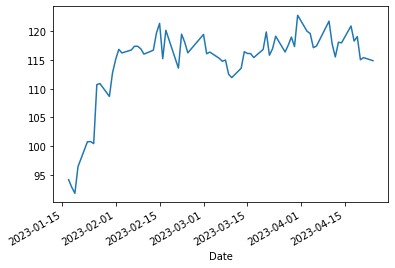

In [13]:
strategy_portfolio.get_portfolio_value()
strategy_portfolio.df_portfolio_value.dropna(inplace=True)
(strategy_portfolio.df_portfolio_value.Total / 100).plot()

再看理论价值

<Axes: xlabel='Date'>

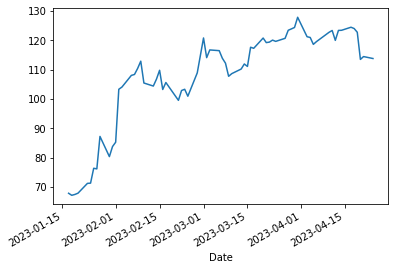

In [15]:
strategy_portfolio.get_theoretic_value()
strategy_portfolio.df_theoretic_value.dropna(inplace=True)
(strategy_portfolio.df_theoretic_value.Total / 100).plot()

可见covered call还是很稳的

## *获得组合希腊值并画图*

获取delta值

<Axes: xlabel='Date'>

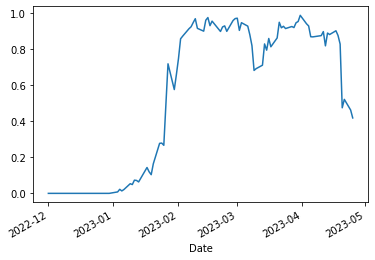

In [25]:
strategy_portfolio.get_portfolio_greeks()
delta = strategy_portfolio.df_portfolio_delta.Total.dropna()
delta = - delta[delta <= 0]
(delta / 100).plot()

获取gamma值

<Axes: xlabel='Date'>

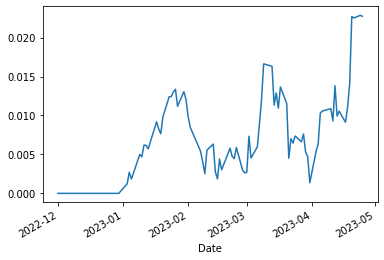

In [27]:
gamma = strategy_portfolio.df_portfolio_gamma.Total.dropna()
gamma = - gamma[gamma <= 0]
(gamma / 100).plot()

获得vega值

<Axes: xlabel='Date'>

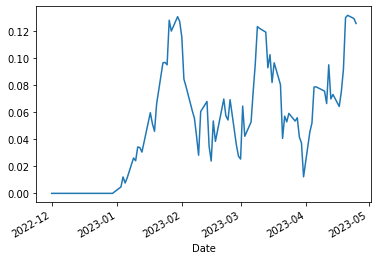

In [28]:
vega = strategy_portfolio.df_portfolio_vega.Total.dropna()
vega = - vega[vega <= 0]
(vega / 100).plot()

<Axes: xlabel='Date'>

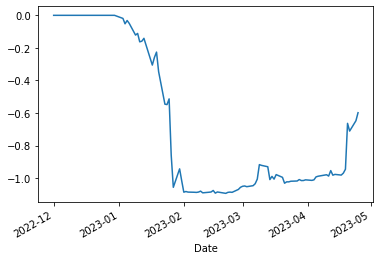

In [30]:
# 获得theta值
theta = strategy_portfolio.df_portfolio_theta.Total.dropna()
theta = - theta[theta >= 0]
(theta / 100).plot()

这个显然是错了，没有那么高的theta